In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Data paths
train_dir = "xray_dataset_covid19\\train"
test_dir = 'xray_dataset_covid19\\test'

In [3]:

# Image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

# Data augmentation and normalization
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess training data
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(img_width, img_height),
                                                    batch_size=batch_size, class_mode='binary')

# Load and preprocess testing data
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(img_width, img_height),
                                                  batch_size=batch_size, class_mode='binary')

# Define CNN model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, steps_per_epoch=train_generator.samples//batch_size,
                    epochs=10, validation_data=test_generator, validation_steps=test_generator.samples//batch_size)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples//batch_size)
print('Test accuracy:', test_acc)


Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


c:\Users\ARJUN KAPADIA\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10


c:\Users\ARJUN KAPADIA\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 584ms/step - accuracy: 0.5977 - loss: 0.7526 - val_accuracy: 0.7188 - val_loss: 0.6440
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5625 - loss: 0.6628 - val_accuracy: 0.2500 - val_loss: 0.6652
Epoch 3/10


c:\Users\ARJUN KAPADIA\AppData\Local\Programs\Python\Python39\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 182ms/step - accuracy: 0.6181 - loss: 0.6646 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - accuracy: 0.4062 - loss: 0.6853 - val_accuracy: 0.9062 - val_loss: 0.5482
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 200ms/step - accuracy: 0.7315 - loss: 0.5770 - val_accuracy: 1.0000 - val_loss: 0.4614
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7812 - loss: 0.5362 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 327ms/step - accuracy: 0.7281 - loss: 0.5760 - val_accuracy: 0.9688 - val_loss: 0.2101
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8500 - loss: 0.4336 - val_accuracy: 1.0000 - val_loss: 0.1772
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 177ms/step - accuracy: 0.8089 - loss: 0.4190 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - accuracy: 0.8750 - loss: 0.4045 - val_accuracy: 0.9375 

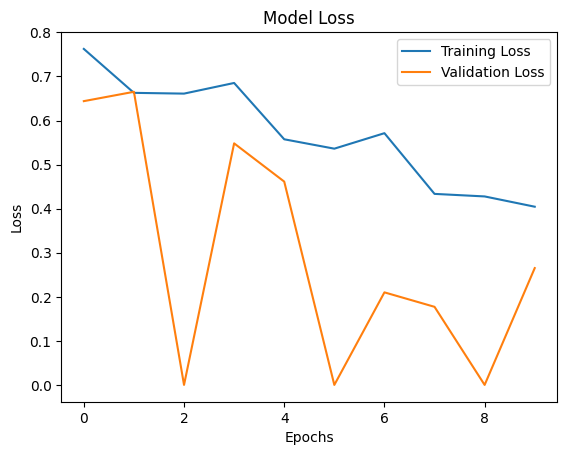

In [4]:
import matplotlib.pyplot as plt

# Plot training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


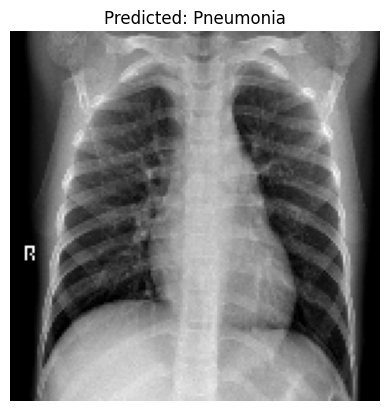

Predicted class: Pneumonia


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

# Load and preprocess the new image
img = image.load_img("C:\\Users\\ARJUN KAPADIA\\Downloads\\archive (16)\\xray_dataset_covid19\\train\\NORMAL\\IM-0086-0001.jpeg", target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # Normalize pixel values

# Make predictions
predictions = model.predict(img_array)

# Interpret results
predicted_class_index = np.argmax(predictions)
class_labels = ['Pneumonia', 'Normal']  # Replace with your class labels
predicted_label = class_labels[predicted_class_index]

# Display the image with the predicted class
plt.imshow(img)
plt.axis('off')
plt.title('Predicted: ' + predicted_label)
plt.show()
print("Predicted class:", predicted_label)
